# Célula responsável por gerar os campos finitos de primos

A geração dos campos finitos de primos de tamanho `p` é feita através da função `GF`. Os campos são depois guardados num *array* para subsequente utilização.

In [1]:
primes = [37, 163, 263, 1009]
ffs = []

for p in primes:
    ff = GF(p)
    ffs.append(ff)

# Célula responsável pelo *plotting* de funções recorrendo aos campos finitos

Para cada um dos campos finitos gerados, é elaborada uma função matemática `f(x) = x**(p-2)`, sendo `p` o tamanho do campo finito. É depois gerado um referencial para cada uma das funções criadas.

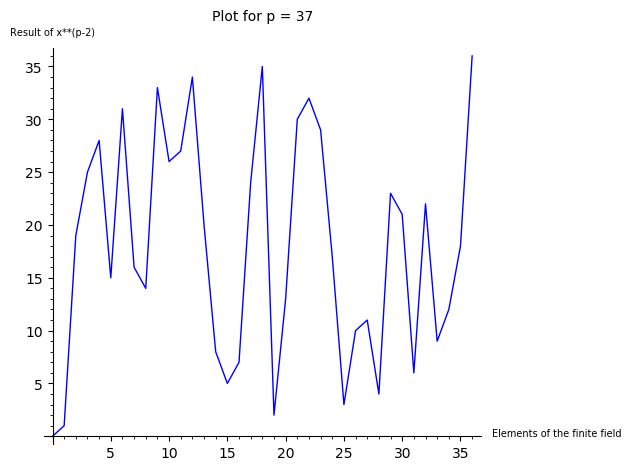

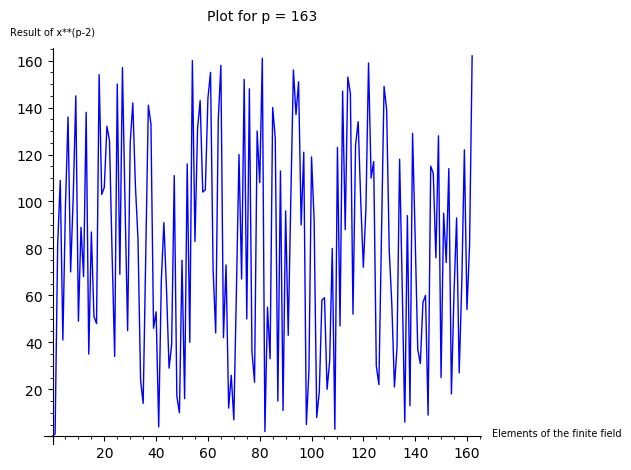

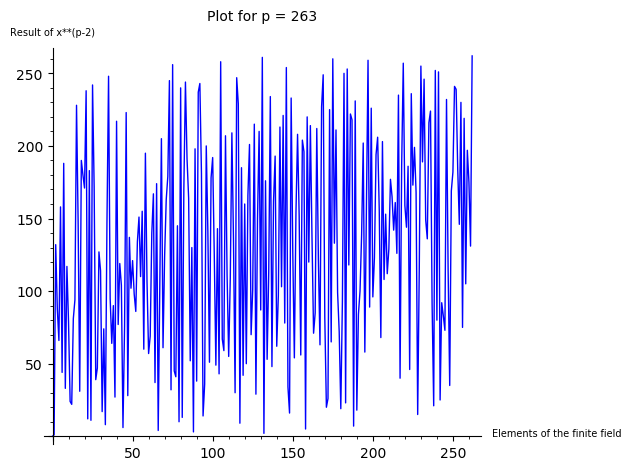

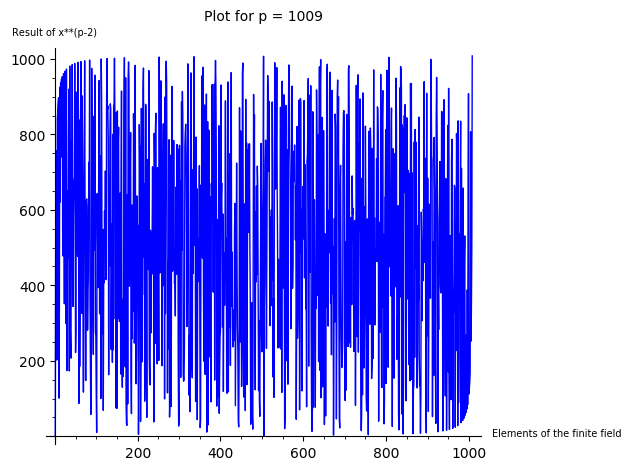

In [2]:
x = var('x')
for i,p in enumerate(primes):
    ff = ffs[i]
    values = []
    for i in range(p):
        values.append((i,ff(i)**(p-2)))
    show(line(values), axes_labels=['Elements of the finite field', 'Result of x**(p-2)'], 
         axes_labels_size=0.7, title='Plot for p = ' + str(p))

# Célula responsável por determinar o menor elemento primitivo de cada campo finito

Um elemento primitivo define-se como um valor do campo finito para o qual, para todo `n`, `g**n = 1` se e só se `n mod p - 1 = 0`. Para cada um dos campos finitos, são analisados os seus primos de modo a determinar o menor elemento primitivo primo.

In [3]:
from random import sample

for ff in ffs:
    primitive = True
    p = int(ff.characteristic())
    g = ff.primitive_element()
    n_exps_random = sample(range(10000000), k=10000)
    for n in n_exps_random:
        fst_cond = g**n == 1
        snd_cond = 0 == n % (p-1)
        if fst_cond != snd_cond:
            primitive = False
    if primitive:
        print(str(g) + ' is a primitive element')
    else:
        print(str(g) + ' is not a primitive element')  

2 is a primitive element
2 is a primitive element
5 is a primitive element
11 is a primitive element


In [4]:
from random import sample

for ff in ffs:
    primitive = False
    p = int(ff.characteristic())
    g = 0 
    while g < p and not primitive:
        aux = ff(g)
        cond = True
        for n in range(p):
            if not(is_prime(g)) and (aux**n != 1 and n % (p-1) == 0) or (aux**n == 1 and n % (p-1) != 0):
                cond = False
                break
        if cond:
            primitive = True
        else :
            g += 1
    if primitive:
        print(str(g) + ' is the lowest primitive element for a finite prime field of size ' + str(p))
    else:
        print('There are no primitive elements in the finite field of size ' + str(p)) 

2 is the lowest primitive element for a finite prime field of size 37
2 is the lowest primitive element for a finite prime field of size 163
5 is the lowest primitive element for a finite prime field of size 263
11 is the lowest primitive element for a finite prime field of size 1009
